In [ ]:
data = !wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip


In [31]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras
from keras.layers.convolutional import Conv2D



In [ ]:
# files = sorted(os.listdir(os.path.expanduser('~/dev/ml_zoomcamp/ml-zoomcamp/lesson 8/catsanddogs')))[:20000]

# source_dir = os.path.expanduser('~/dev/ml_zoomcamp/ml-zoomcamp/lesson 8/catsanddogs/')

# for file in files:
#     if(file.startswith("cat")):
#         shutil.copy(os.path.join(source_dir, file), os.path.expanduser('~/dev/ml_zoomcamp/ml-zoomcamp/lesson 8/homework/train/cats'))
#     elif(file.startswith("dog")):
#         shutil.copy(os.path.join(source_dir, file), os.path.expanduser('~/dev/ml_zoomcamp/ml-zoomcamp/lesson 8/homework/train/dogs'))

In [32]:
inputs = keras.Input(shape = (150, 150, 3))
conv = keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3))(inputs)
pooling = keras.layers.MaxPooling2D(pool_size = (2,2))(conv)
vectors = keras.layers.Flatten()(pooling)
inner = keras.layers.Dense(64, activation='relu')(vectors)
outputs = keras.layers.Dense(1)(inner)
model = keras.Model(inputs, outputs)

optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

/Users/deepa/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory('./homework/train', target_size=(150, 150), batch_size=20, class_mode='binary')

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory('./homework/validation', target_size=(150, 150), batch_size=20, shuffle=False)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [55]:
# train_ds.class_indices
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


Epoch 1/10
100/100 [==============================] - 33s 322ms/step - loss: 0.6662 - accuracy: 0.6010 - val_loss: 0.7203 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 32s 319ms/step - loss: 0.6703 - accuracy: 0.5915 - val_loss: 0.7140 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 32s 320ms/step - loss: 0.6672 - accuracy: 0.6010 - val_loss: 0.7148 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 32s 322ms/step - loss: 0.6699 - accuracy: 0.6040 - val_loss: 0.7172 - val_accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 32s 323ms/step - loss: 0.6759 - accuracy: 0.5735 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 6/10
100/100 [==============================] - 32s 323ms/step - loss: 0.6757 - accuracy: 0.5790 - val_loss: 0.7155 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 32s 322ms/step - loss: 0.6715 - accuracy: 0.5875 - val_loss: 0.7138 - val_ac

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

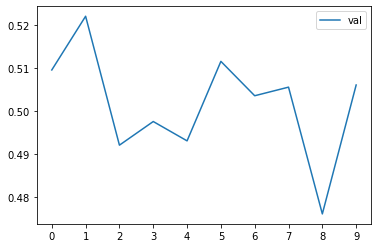

In [51]:
plt.plot(history.history['accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [57]:
np.std(history.history['loss'])

0.0029556254343982083

In [56]:
np.mean(history.history['accuracy'])

0.5898500323295593

In [58]:
train_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_ds = train_gen.flow_from_directory('./homework/train', target_size=(150, 150), batch_size=20, class_mode='binary')



Found 20000 images belonging to 2 classes.


In [59]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


Epoch 1/10
100/100 [==============================] - 33s 323ms/step - loss: 0.6965 - accuracy: 0.4935 - val_loss: 0.7421 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 32s 323ms/step - loss: 0.7024 - accuracy: 0.4805 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 32s 323ms/step - loss: 0.7024 - accuracy: 0.4905 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 32s 322ms/step - loss: 0.7077 - accuracy: 0.5165 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 32s 323ms/step - loss: 0.6942 - accuracy: 0.5095 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 6/10
100/100 [==============================] - 32s 323ms/step - loss: 0.6936 - accuracy: 0.5080 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 32s 322ms/step - loss: 0.7004 - accuracy: 0.5040 - val_loss: 0.7009 - val_ac

In [60]:
np.mean(history.history['val_loss'])

0.7055630028247833

In [61]:
np.mean(history.history['val_accuracy'])

0.5